# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./ionosphere_data.csv')

In [3]:
pd.options.display.max_columns = None

In [4]:
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [5]:
len(df[df['label'] == 'g'])

225

In [6]:
len(df[df['label'] == 'b'])

126

In [7]:
# g_label = df[df['label'] == 'g'].sample(126)
# b_label = df[df['label'] == 'b']
# df = g_label.append(b_label, ignore_index=True)

In [8]:
len(df)

351

In [9]:
df.isna().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

In [11]:
{col: len(list(df[col].unique())) for col in df.columns}

{'feature1': 2,
 'feature2': 1,
 'feature3': 219,
 'feature4': 269,
 'feature5': 204,
 'feature6': 259,
 'feature7': 231,
 'feature8': 260,
 'feature9': 244,
 'feature10': 267,
 'feature11': 246,
 'feature12': 269,
 'feature13': 238,
 'feature14': 266,
 'feature15': 234,
 'feature16': 270,
 'feature17': 254,
 'feature18': 280,
 'feature19': 254,
 'feature20': 266,
 'feature21': 248,
 'feature22': 265,
 'feature23': 248,
 'feature24': 264,
 'feature25': 256,
 'feature26': 273,
 'feature27': 256,
 'feature28': 281,
 'feature29': 244,
 'feature30': 266,
 'feature31': 243,
 'feature32': 263,
 'feature33': 245,
 'feature34': 263,
 'label': 2}

Since feature2 has only one unique value so it will not affect output and we don't need it

In [12]:
df.drop(columns='feature2', inplace=True)

In [13]:
df.columns

Index(['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7',
       'feature8', 'feature9', 'feature10', 'feature11', 'feature12',
       'feature13', 'feature14', 'feature15', 'feature16', 'feature17',
       'feature18', 'feature19', 'feature20', 'feature21', 'feature22',
       'feature23', 'feature24', 'feature25', 'feature26', 'feature27',
       'feature28', 'feature29', 'feature30', 'feature31', 'feature32',
       'feature33', 'feature34', 'label'],
      dtype='object')

In [14]:
df = df.sample(frac=1)

In [15]:
df

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
202,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.85000,-1.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,-1.00000,-0.60000,-1.00000,1.00000,1.00000,-1.00000,-0.20000,1.00000,-1.00000,0.00000,1.00000,0.00000,0.00000,b
213,1,1.00000,0.14286,1.00000,0.71429,1.00000,0.71429,1.00000,-0.14286,0.85714,-0.14286,1.00000,0.02534,1.00000,0.00000,0.42857,-0.14286,1.00000,0.03617,1.00000,-0.28571,1.00000,0.00000,0.28571,-0.28571,1.00000,0.04891,1.00000,0.05182,1.00000,0.57143,1.00000,0.00000,g
212,1,-1.00000,-0.59677,0.00000,0.00000,-1.00000,0.64516,-0.87097,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,0.00000,0.00000,0.29839,0.23387,1.00000,0.51613,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,b
319,1,0.85013,0.01809,0.92211,0.01456,0.92046,0.02180,0.92765,0.08010,0.87597,0.11370,0.91161,0.04320,0.90738,0.05018,0.87339,0.02842,0.95866,0.00000,0.89097,0.07047,0.88430,0.07697,0.83721,0.10853,0.86923,0.08950,0.87597,0.08786,0.85198,0.10134,0.84258,0.10698,g
57,0,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-0.18750,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,-1.00000,-1.00000,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,1,1.00000,0.09802,1.00000,0.25101,0.98390,0.33044,0.80365,0.53020,0.74977,0.60297,0.56937,0.71942,0.55311,0.74079,0.29452,0.82193,0.21137,0.79777,0.09709,0.82162,-0.01734,0.79870,-0.15144,0.75596,-0.22839,0.69187,-0.31713,0.60948,-0.40291,0.54522,-0.42815,0.44534,g
137,1,0.26667,-0.10000,0.53333,0.00000,0.33333,-0.13333,0.36667,0.11667,0.56667,0.01667,0.71667,0.08333,0.70000,-0.06667,0.53333,0.20000,0.41667,-0.01667,0.31667,0.20000,0.70000,0.00000,0.25000,0.13333,0.46214,0.05439,0.40000,0.03333,0.46667,0.03333,0.41667,-0.05000,g
303,1,0.94052,-0.01531,0.94170,0.01001,0.94994,-0.01472,0.95878,-0.01060,0.94641,-0.03710,0.97173,-0.01767,0.97055,-0.03887,0.95465,-0.04064,0.95230,-0.04711,0.94229,-0.02179,0.92815,-0.04417,0.92049,-0.04476,0.92695,-0.05827,0.90342,-0.07479,0.91991,-0.07244,0.92049,-0.07420,g
199,1,0.79847,0.38265,0.80804,-0.16964,1.00000,-0.07653,0.98151,-0.07398,0.70217,0.20663,0.99745,0.02105,0.98214,0.02487,1.00000,-0.13074,0.95663,0.07717,1.00000,0.00191,0.90306,0.30804,1.00000,-0.14541,1.00000,-0.00394,0.75638,0.07908,1.00000,-0.18750,1.00000,-0.05740,g


Encode labels

In [16]:
df['label'] = df['label'].apply(lambda x: 0 if x == 'b' else 1)

In [17]:
df.label

202    0
213    1
212    0
319    1
57     0
      ..
262    1
137    1
303    1
199    1
128    0
Name: label, Length: 351, dtype: int64

Separating labels 

In [18]:
labels = df['label']
df.drop(columns='label', inplace=True)

In [19]:
df.columns

Index(['feature1', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7',
       'feature8', 'feature9', 'feature10', 'feature11', 'feature12',
       'feature13', 'feature14', 'feature15', 'feature16', 'feature17',
       'feature18', 'feature19', 'feature20', 'feature21', 'feature22',
       'feature23', 'feature24', 'feature25', 'feature26', 'feature27',
       'feature28', 'feature29', 'feature30', 'feature31', 'feature32',
       'feature33', 'feature34'],
      dtype='object')

In [20]:
labels = np.array(labels.astype('float32'))

In [21]:
df = np.array(df)

In [22]:
type(df)

numpy.ndarray

Splitting traing and test data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_data, test_data, train_l, test_l = train_test_split(df, labels, test_size=0.4)

In [25]:
train_data.shape, train_l.shape

((210, 33), (210,))

In [26]:
test_data.shape, test_l.shape

((141, 33), (141,))

Normalization

In [27]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [28]:
np.max(train_data)

2.1302597913870867

In [29]:
np.min(train_data)

-3.4482917797097823

Model Architecture 

In [30]:
from keras import models, layers

In [31]:
network = models.Sequential()
network.add(layers.Dense(16, activation='relu', input_shape=(train_data.shape[-1],)))
network.add(layers.Dense(1, activation='sigmoid'))

Compilation

In [32]:
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='acc')

Training

In [33]:
history = network.fit(train_data, train_l, epochs=100, batch_size=8, validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 0s 21ms/step - loss: 0.7786 - acc: 0.6310 - val_loss: 0.7372 - val_acc: 0.6905
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6674 - acc: 0.7143 - val_loss: 0.6559 - val_acc: 0.7381
Epoch 3/100
21/21 [==============================] - 0s 3ms/step - loss: 0.5916 - acc: 0.7679 - val_loss: 0.5867 - val_acc: 0.7857
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5326 - acc: 0.7857 - val_loss: 0.5327 - val_acc: 0.7857
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4850 - acc: 0.8155 - val_loss: 0.4888 - val_acc: 0.7619
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4468 - acc: 0.8274 - val_loss: 0.4546 - val_acc: 0.8095
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4157 - acc: 0.8571 - val_loss: 0.4266 - val_acc: 0.8333
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3866 - 

21/21 [==============================] - 0s 3ms/step - loss: 0.0707 - acc: 0.9821 - val_loss: 0.2556 - val_acc: 0.9048
Epoch 64/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0694 - acc: 0.9821 - val_loss: 0.2549 - val_acc: 0.9048
Epoch 65/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0672 - acc: 0.9821 - val_loss: 0.2578 - val_acc: 0.9048
Epoch 66/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0657 - acc: 0.9821 - val_loss: 0.2589 - val_acc: 0.9048
Epoch 67/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0644 - acc: 0.9821 - val_loss: 0.2592 - val_acc: 0.9048
Epoch 68/100
21/21 [==============================] - 0s 2ms/step - loss: 0.0620 - acc: 0.9821 - val_loss: 0.2612 - val_acc: 0.9048
Epoch 69/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0607 - acc: 0.9821 - val_loss: 0.2659 - val_acc: 0.9048
Epoch 70/100
21/21 [==============================] - 0s 3ms/step - loss: 0.0591 - acc: 0

In [34]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

plot between loss and val_loss

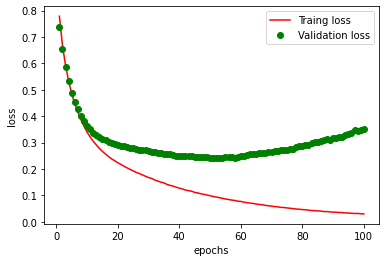

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss, 'r-', label='Traing loss')
plt.plot(epochs, val_loss, 'go', label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [36]:
from keras import regularizers

In [37]:
network = models.Sequential()
network.add(layers.Dense(8, activation='relu',input_shape=(train_data.shape[-1],)))
network.add(layers.Dropout(0.2))
network.add(layers.Dense(1, activation='sigmoid'))
network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='acc')
history = network.fit(train_data, train_l, epochs=100, batch_size=1, validation_split=0.2)

Epoch 1/100
168/168 [==============================] - 0s 2ms/step - loss: 0.6562 - acc: 0.6845 - val_loss: 0.5108 - val_acc: 0.7381
Epoch 2/100
168/168 [==============================] - 0s 1ms/step - loss: 0.5267 - acc: 0.7798 - val_loss: 0.4341 - val_acc: 0.7619
Epoch 3/100
168/168 [==============================] - 0s 1ms/step - loss: 0.5090 - acc: 0.8095 - val_loss: 0.3905 - val_acc: 0.8095
Epoch 4/100
168/168 [==============================] - 0s 1ms/step - loss: 0.4572 - acc: 0.8095 - val_loss: 0.3594 - val_acc: 0.8095
Epoch 5/100
168/168 [==============================] - 0s 1ms/step - loss: 0.4368 - acc: 0.8274 - val_loss: 0.3333 - val_acc: 0.7857
Epoch 6/100
168/168 [==============================] - 0s 1ms/step - loss: 0.3908 - acc: 0.8214 - val_loss: 0.3144 - val_acc: 0.8095
Epoch 7/100
168/168 [==============================] - 0s 1ms/step - loss: 0.3544 - acc: 0.8631 - val_loss: 0.3021 - val_acc: 0.8571
Epoch 8/100
168/168 [==============================] - 0s 1ms/step - 

168/168 [==============================] - 0s 1ms/step - loss: 0.1611 - acc: 0.9405 - val_loss: 0.3069 - val_acc: 0.9048
Epoch 63/100
168/168 [==============================] - 0s 1ms/step - loss: 0.1588 - acc: 0.9345 - val_loss: 0.3017 - val_acc: 0.9048
Epoch 64/100
168/168 [==============================] - 0s 2ms/step - loss: 0.1823 - acc: 0.9226 - val_loss: 0.2950 - val_acc: 0.9048
Epoch 65/100
168/168 [==============================] - 0s 1ms/step - loss: 0.1574 - acc: 0.9464 - val_loss: 0.2999 - val_acc: 0.9048
Epoch 66/100
168/168 [==============================] - 0s 1ms/step - loss: 0.0953 - acc: 0.9762 - val_loss: 0.3134 - val_acc: 0.9048
Epoch 67/100
168/168 [==============================] - 0s 1ms/step - loss: 0.1260 - acc: 0.9583 - val_loss: 0.3103 - val_acc: 0.9048
Epoch 68/100
168/168 [==============================] - 0s 1ms/step - loss: 0.1079 - acc: 0.9524 - val_loss: 0.3096 - val_acc: 0.9048
Epoch 69/100
168/168 [==============================] - 0s 1ms/step - loss:

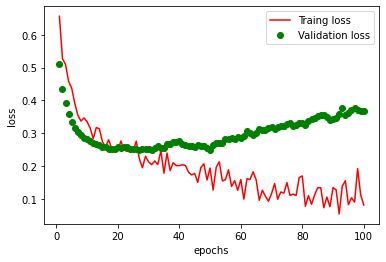

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss, 'r-', label='Traing loss')
plt.plot(epochs, val_loss, 'go', label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plot between training accuracy and val_accuracy

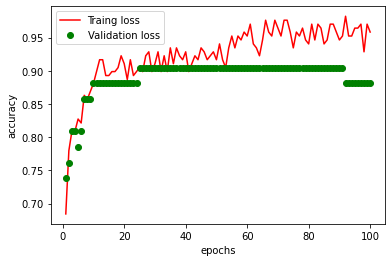

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,101)
plt.plot(epochs, acc, 'r-', label='Traing loss')
plt.plot(epochs, val_acc, 'go', label='Validation loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Final training 

In [40]:
model = models.Sequential()
model.add(layers.Dense(34, activation='relu', input_shape=(train_data.shape[-1],)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(17, activation='relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(1,  activation='sigmoid'))
model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_l, epochs=50, batch_size = 32)

Epoch 1/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6711 - accuracy: 0.5333
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.7619
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5669 - accuracy: 0.7714
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.8429
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.8524
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.8619
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8619
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8810
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 0.3864 - accuracy: 0.8857
Epoch 10/50
7/7 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8524
Epoch 11/50
7/7 [======================

In [41]:
loss, acc = model.evaluate(test_data, test_l)

5/5 [==============================] - 0s 1ms/step - loss: 0.1882 - accuracy: 0.9220


In [42]:
pred = model.predict(test_data)

In [46]:
prediction = pred[:5]

In [55]:
prediction

array([[9.9853849e-01],
       [8.9865267e-01],
       [9.7733772e-01],
       [7.5878095e-05],
       [9.8592806e-01]], dtype=float32)

In [60]:
for i in prediction[:,0]:
    print(round(i))

1
1
1
0
1


In [61]:
test_l[:5]

array([1., 1., 1., 0., 1.], dtype=float32)